<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Data Analysis of Singapore Rainfall

--- 
# Part 1

Part 1 requires knowledge of basic Python.

---

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

### Choose your Data

There are 2 datasets included in the [`data`](./data/) folder for this project. These correponds to rainfall information. 

* [`rainfall-monthly-number-of-rain-days.csv`](./data/rainfall-monthly-number-of-rain-days.csv): Monthly number of rain days from 1982 to 2022. A day is considered to have “rained” if the total rainfall for that day is 0.2mm or more.
* [`rainfall-monthly-total.csv`](./data/rainfall-monthly-total.csv): Monthly total rain recorded in mm(millimeters) from 1982 to 2022

Other relevant weather datasets from [data.gov.sg](data.gov.sg) that you can download and use are as follows:

* [Relative Humidity](https://data.gov.sg/dataset/relative-humidity-monthly-mean)
* [Monthly Maximum Daily Rainfall](https://data.gov.sg/dataset/rainfall-monthly-maximum-daily-total)
* [Hourly wet buld temperature](https://data.gov.sg/dataset/wet-bulb-temperature-hourly)
* [Monthly mean sunshine hours](https://data.gov.sg/dataset/sunshine-duration-monthly-mean-daily-duration)
* [Surface Air Temperature](https://data.gov.sg/dataset/surface-air-temperature-mean-daily-minimum)

You can also use other datasets for your analysis, make sure to cite the source when you are using them

According to the [Meteorological Services Singapore](http://www.weather.gov.sg/climate-climate-of-singapore/#:~:text=Singapore%20is%20situated%20near%20the,month%2Dto%2Dmonth%20variation.), Singapore has typical tropical climate with adundant rainfall, high and uniform temperatures and high humidity all year round, since its situated near the equator. There are many factors that help us understand the climate of a country and in this project we are going to look into a few, especially rainfall.

Singapore’s climate is characterised by two main monsoon seasons separated by inter-monsoonal periods.  The **Northeast Monsoon** occurs from December to early March, and the **Southwest Monsoon** from June to September.

The major weather systems affecting Singapore that can lead to heavy rainfall are:

-Monsoon surges, or strong wind episodes in the Northeast Monsoon flow bringing about major rainfall events;

-Sumatra squalls, an organised line of thunderstorms travelling eastward across Singapore, having developed over the island of Sumatra or Straits of Malacca west of us;

-Afternoon and evening thunderstorms caused by strong surface heating and by the sea breeze circulation that develops in the afternoon.

Singapore’s climate station has been located at several different sites in the past 140 years. The station had been decommissioned at various points in the past due to changes to local land use in the site’s vicinity, and had to be relocated. Since 1984, the climate station has been located at **Changi**.

There are other metrics of climate such as temperature, humidity, sun shine duration, wind speed, cloud cover etc. All the dataset used in the project comes from [data.gov.sg](data.gov.sg), as recorded at the Changi climate station 


**To-Do:** *Fill out this cell with the datasets you will use for your analysis. Write a brief description of the contents for each dataset that you choose.*

## Problem Statement

Decide on your problem statement that will guide your analysis for this project. For guidelines, sample prompts, or inspiration, check out the README.

**To-Do:** *Replace this cell with your problem statement.*

Rainfall affects daily activities of Singapore population, hence it is worth analysing rainfall data to identify trends 

### Outside Research

Based on your problem statement and your chosen datasets, spend some time doing outside research on how climate change is affecting different industries or additional information that might be relevant. Summarize your findings below. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. **Make sure that you cite your sources.**

**To-Do:** *Fill out this cell with outside research or any additional background information that will support your analysis.*

### Coding Challenges

1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
    *Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [59]:
# Code:
def total(lst):
    total = 0
    for i in lst:
        total += i
    return total

# Creating a function for mean
def average(lst):
    avg = total(lst) / len(lst)
    return avg

In [60]:
test_lst = [10,20,30,40,50]
average(test_lst)

30.0

2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [61]:
# Code:
def stdev(lst):
    avg = total(lst) / len(lst)
    squared_deviations = []
    for i in lst:
        squared_deviations.append((i - avg)**2)
    sd = (1 / (len(lst)-1) * total(squared_deviations))**0.5
    return sd

In [62]:
test_lst = [10,20,30,40,50]
stdev(test_lst)

15.811388300841896

In [63]:
np.std(test_lst, ddof=1)

15.811388300841896

--- 
# Part 2

Part 2 requires knowledge of Pandas, EDA, data cleaning, and data visualization.

---

*All libraries used should be added here*

In [64]:
# Imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Import and Cleaning

### Data Import & Cleaning

Import all the datasets that you selected for this project and go through the following steps at a minimum. You are welcome to do further cleaning as you feel necessary. Make sure to comment your code to showcase the intent behind the data processing step.
1. Display the data: print the first 5 rows of each dataframe to your Jupyter notebook.
2. Check for missing values and datatype.
3. Check for any obvious issues with the observations.
4. Fix any errors you identified in steps 2-3.
6. Fix any incorrect data types found in step 5.
    - Fix any individual values preventing other columns from being the appropriate type.
    - If the month column data is better analyzed as month and year, create new columns for the same
7. Rename Columns.
    - Column names should be all lowercase.
    - Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`).
    - Column names should be unique and informative.
8. Drop unnecessary rows (if needed).
9. Merge dataframes that can be merged.
    - Since different climate metrics are in month format, you can merge them into one single dataframe for easier analysis
10. Perform any additional cleaning that you feel is necessary.
11. Save your cleaned and merged dataframes as csv files.

In [65]:
# Code:
df_rain_days = pd.read_csv('data/monthly_number_of_rain_days.csv')
df_rainfall = pd.read_csv('data/monthly_rainfall_total.csv')

df_avg_temp = pd.read_csv('data/monthly_mean_surface_air_temperature.csv')
df_sun_hours = pd.read_csv('data/monthly_mean_sunshine_hours.csv')
df_humidity = pd.read_csv('data/monthly_mean_relative_humidity.csv')
df_wet_buld = pd.read_csv('data/hourly_wet_buld_temperature.csv')
df_max_rainfall = pd.read_csv('data/monthly_maximum_daily_rainfall.csv')


In [66]:
# Code: df_rainfall - Monthly total rain recorded in mm.
print(df_rainfall.shape)
df_rainfall.info()

(499, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   month           499 non-null    object 
 1   total_rainfall  499 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.9+ KB


In [67]:
print(df_rainfall.head())
df_rainfall.isnull().sum()

     month  total_rainfall
0  1982-01           107.1
1  1982-02            27.8
2  1982-03           160.8
3  1982-04           157.0
4  1982-05           102.2


month             0
total_rainfall    0
dtype: int64

In [68]:
# Code: df_rain_days - Monthly number of rain day.
print(df_rain_days.shape)
df_rain_days.info()

(499, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   month             499 non-null    object
 1   no_of_rainy_days  499 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 7.9+ KB


In [69]:
print(df_rain_days.head())
df_rain_days.isnull().sum()

     month  no_of_rainy_days
0  1982-01                10
1  1982-02                 5
2  1982-03                11
3  1982-04                14
4  1982-05                10


month               0
no_of_rainy_days    0
dtype: int64

In [70]:
# Code: df_avg_temp - Monthly number of rain day.
print(df_avg_temp.shape)
print(df_avg_temp.info())

(499, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   month                499 non-null    object 
 1   temp_mean_daily_min  499 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.9+ KB
None


In [71]:
print(df_avg_temp.head())
df_avg_temp.isnull().sum()

     month  temp_mean_daily_min
0  1982-01                 23.3
1  1982-02                 23.9
2  1982-03                 24.3
3  1982-04                 24.3
4  1982-05                 25.2


month                  0
temp_mean_daily_min    0
dtype: int64

In [72]:
# Code: df_sun_hours - Monthly number of sunshine hours.
print(df_sun_hours.shape)
print(df_sun_hours.info())

(499, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   month              499 non-null    object 
 1   mean_sunshine_hrs  499 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.9+ KB
None


In [73]:
print(df_sun_hours.head())
df_sun_hours.isnull().sum()

     month  mean_sunshine_hrs
0  1982-01                5.6
1  1982-02                7.6
2  1982-03                5.1
3  1982-04                4.7
4  1982-05                5.8


month                0
mean_sunshine_hrs    0
dtype: int64

In [74]:
# Code: df_humidity - Monthly number of humidity.
print(df_humidity.shape)
print(df_humidity.info())

(499, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   month    499 non-null    object 
 1   mean_rh  499 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.9+ KB
None


In [75]:
print(df_humidity.head())
df_humidity.isnull().sum()

     month  mean_rh
0  1982-01     81.2
1  1982-02     79.5
2  1982-03     82.3
3  1982-04     85.9
4  1982-05     83.2


month      0
mean_rh    0
dtype: int64

In [76]:
# Code: df_wet_buld - Monthly number of wet buld. (อุณหภูมิของอากาศที่วัดได้ด้วยเทอร์โมมิเตอร์ที่กระเปาะถูกหุ้มด้วยผ้าเปียก)
print(df_wet_buld.shape)
print(df_wet_buld.info())

(364488, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364488 entries, 0 to 364487
Data columns (total 3 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   wbt_date              364488 non-null  object 
 1   wbt_time              364488 non-null  int64  
 2   wet_bulb_temperature  364488 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 8.3+ MB
None


In [77]:
print(df_wet_buld.head())
df_wet_buld.isnull().sum()

     wbt_date  wbt_time  wet_bulb_temperature
0  1982-01-01         1                  24.7
1  1982-01-01         2                  24.5
2  1982-01-01         3                  24.3
3  1982-01-01         4                  24.2
4  1982-01-01         5                  24.2


wbt_date                0
wbt_time                0
wet_bulb_temperature    0
dtype: int64

In [78]:
# Code: df_wet_buld - Monthly max rainfall
print(df_max_rainfall.shape)
print(df_max_rainfall.info())

(499, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 2 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      499 non-null    object 
 1   maximum_rainfall_in_a_day  499 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.9+ KB
None


In [79]:
print(df_max_rainfall.head())
df_max_rainfall.isnull().sum()

     month  maximum_rainfall_in_a_day
0  1982-01                       36.5
1  1982-02                        9.4
2  1982-03                       61.7
3  1982-04                       45.1
4  1982-05                       33.0


month                        0
maximum_rainfall_in_a_day    0
dtype: int64

In [80]:
# Cleaning the df_rainfall
# Converting the 'month' column from string to Datetime and rename to date

df_rainfall['month'] = pd.to_datetime(df_rainfall['month'])

df_rainfall.rename(columns = {'month': 'date'}, inplace = True)
print(df_rainfall.info())
df_rainfall.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            499 non-null    datetime64[ns]
 1   total_rainfall  499 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 7.9 KB
None


,date,total_rainfall
0,1982-01-01,107.1
1,1982-02-01,27.8
2,1982-03-01,160.8
3,1982-04-01,157.0
4,1982-05-01,102.2


In [81]:
# Cleaning the df_rain_days
# Converting the 'month' column from string to Datetime and rename to date
df_rain_days['month'] = pd.to_datetime(df_rain_days['month'])

df_rain_days.rename(columns = {'month': 'date'}, inplace = True)
print(df_rain_days.info())
df_rain_days.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              499 non-null    datetime64[ns]
 1   no_of_rainy_days  499 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 7.9 KB
None


,date,no_of_rainy_days
0,1982-01-01,10
1,1982-02-01,5
2,1982-03-01,11
3,1982-04-01,14
4,1982-05-01,10


In [82]:
# Cleaning the df_avg_temp
# Converting the 'month' column from string to Datetime and rename month > date

df_avg_temp.rename(columns = {'month': 'date'}, inplace = True)
df_avg_temp['date'] = pd.to_datetime(df_avg_temp['date'])

df_avg_temp['year'] = df_avg_temp['date'].dt.year
df_avg_temp['month'] = df_avg_temp['date'].dt.month

print(df_avg_temp.info())
df_avg_temp.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 499 non-null    datetime64[ns]
 1   temp_mean_daily_min  499 non-null    float64       
 2   year                 499 non-null    int32         
 3   month                499 non-null    int32         
dtypes: datetime64[ns](1), float64(1), int32(2)
memory usage: 11.8 KB
None


,date,temp_mean_daily_min,year,month
0,1982-01-01,23.3,1982,1
1,1982-02-01,23.9,1982,2
2,1982-03-01,24.3,1982,3
3,1982-04-01,24.3,1982,4
4,1982-05-01,25.2,1982,5


In [83]:
df_avg_temp['year'] = df_avg_temp['date'].dt.year
df_avg_temp['month'] = df_avg_temp['date'].dt.month

In [84]:
# Cleaning the df_sun_hours
# Converting the 'month' column from string to Datetime and rename to date
df_sun_hours['month'] = pd.to_datetime(df_sun_hours['month'])

df_sun_hours.rename(columns = {'month': 'date'}, inplace = True)
print(df_sun_hours.info())
df_sun_hours.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               499 non-null    datetime64[ns]
 1   mean_sunshine_hrs  499 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 7.9 KB
None


,date,mean_sunshine_hrs
0,1982-01-01,5.6
1,1982-02-01,7.6
2,1982-03-01,5.1
3,1982-04-01,4.7
4,1982-05-01,5.8


In [85]:
# Cleaning the df_humidity
# Converting the 'month' column from string to Datetime and rename month > date , mean_rh > mean_relative_humidity
df_humidity['month'] = pd.to_datetime(df_humidity['month'])

df_humidity.rename(columns = {'month': 'date', 'mean_rh': 'mean_relative_humidity'}, inplace = True)
df_humidity['year'] = df_humidity['date'].dt.year
df_humidity['month'] = df_humidity['date'].dt.month
df_humidity['month_name'] = pd.to_datetime(df_humidity['month'],format='%m').dt.month_name()

print(df_humidity.info())
df_humidity.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    499 non-null    datetime64[ns]
 1   mean_relative_humidity  499 non-null    float64       
 2   year                    499 non-null    int32         
 3   month                   499 non-null    int32         
 4   month_name              499 non-null    object        
dtypes: datetime64[ns](1), float64(1), int32(2), object(1)
memory usage: 15.7+ KB
None


,date,mean_relative_humidity,year,month,month_name
0,1982-01-01,81.2,1982,1,January
1,1982-02-01,79.5,1982,2,February
2,1982-03-01,82.3,1982,3,March
3,1982-04-01,85.9,1982,4,April
4,1982-05-01,83.2,1982,5,May


In [86]:
# For re-create df_wet_buld
#df_wet_buld = pd.read_csv('data/hourly_wet_buld_temperature.csv')

In [87]:
# Cleaning the df_wet_buld
# Converting the 'month' column from string to Datetime
# wbt_time have error 0 replace it to 24
df_wet_buld['wbt_date'] = pd.to_datetime(df_wet_buld['wbt_date'])

df_wet_buld.rename(columns = {'wbt_date': 'date'}, inplace = True)
df_wet_buld['wbt_time'] = df_wet_buld['wbt_time'].replace(0, 24)

df_wet_buld['year'] = df_wet_buld['date'].dt.year
df_wet_buld['month'] = df_wet_buld['date'].dt.month

print(df_wet_buld.info())
df_wet_buld.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364488 entries, 0 to 364487
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   date                  364488 non-null  datetime64[ns]
 1   wbt_time              364488 non-null  int64         
 2   wet_bulb_temperature  364488 non-null  float64       
 3   year                  364488 non-null  int32         
 4   month                 364488 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(2), int64(1)
memory usage: 11.1 MB
None


,date,wbt_time,wet_bulb_temperature,year,month
0,1982-01-01,1,24.7,1982,1
1,1982-01-01,2,24.5,1982,1
2,1982-01-01,3,24.3,1982,1
3,1982-01-01,4,24.2,1982,1
4,1982-01-01,5,24.2,1982,1


In [88]:
# Cleaning the x
# Converting the 'month' column from string to Datetime and maximum_rainfall_in_a_day > max_rainall_in_day
df_max_rainfall['month'] = pd.to_datetime(df_max_rainfall['month'])

df_max_rainfall.rename(columns = {'month': 'date','maximum_rainfall_in_a_day' : 'max_rainall_in_day'}, inplace = True)
print(df_max_rainfall.info())
df_max_rainfall.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                499 non-null    datetime64[ns]
 1   max_rainall_in_day  499 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 7.9 KB
None


,date,max_rainall_in_day
0,1982-01-01,36.5
1,1982-02-01,9.4
2,1982-03-01,61.7
3,1982-04-01,45.1
4,1982-05-01,33.0


364488


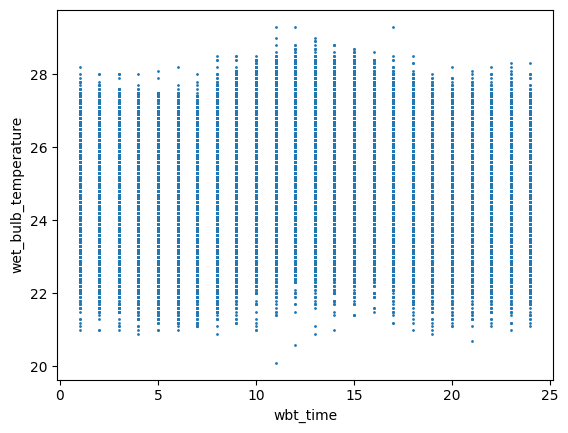

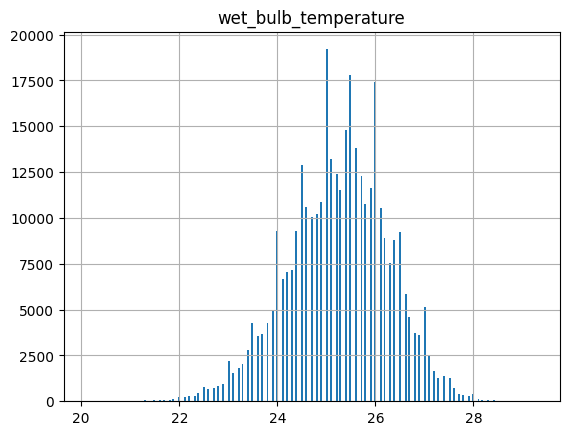

In [89]:
df_wet_buld.plot(kind = 'scatter', x = 'wbt_time', y = 'wet_bulb_temperature',s=1)
df_wet_buld.hist(column='wet_bulb_temperature',bins='auto')
df_wet_buld['wbt_time'].unique()
print(len(df_wet_buld.wbt_time))

In [90]:
# Create the df_wet_buld_agg : average of wet_bulb_temperature group by year,month

df_wet_buld_agg = df_wet_buld.groupby(['year','month'])['wet_bulb_temperature'].mean().reset_index()
df_wet_buld_agg['month_name'] = pd.to_datetime(df_wet_buld_agg['month'],format='%m').dt.month_name()
#df_wet_buld_agg.index = df_wet_buld_agg['year'] # set index

df_wet_buld_agg['date'] = df_wet_buld_agg['year'].astype(str) + "-" + df_wet_buld_agg['month'].astype(str) + "-01"
df_wet_buld_agg['date'] = pd.to_datetime(df_wet_buld_agg['date'])

print(df_wet_buld_agg)

     year  month  wet_bulb_temperature month_name       date
0    1982      1             23.456048    January 1982-01-01
1    1982      2             24.297619   February 1982-02-01
2    1982      3             24.811559      March 1982-03-01
3    1982      4             25.103750      April 1982-04-01
4    1982      5             25.689651        May 1982-05-01
..    ...    ...                   ...        ...        ...
494  2023      3             24.308199      March 2023-03-01
495  2023      4             25.440139      April 2023-04-01
496  2023      5             25.754435        May 2023-05-01
497  2023      6             25.562639       June 2023-06-01
498  2023      7             25.300269       July 2023-07-01

[499 rows x 5 columns]


In [91]:
df_wet_buld_agg['date'] = df_wet_buld_agg['year'].astype(str) + "-" + df_wet_buld_agg['month'].astype(str) + "-01"
df_wet_buld_agg['date'] = pd.to_datetime(df_wet_buld_agg['date'])

In [92]:
df_wet_buld_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   year                  499 non-null    int32         
 1   month                 499 non-null    int32         
 2   wet_bulb_temperature  499 non-null    float64       
 3   month_name            499 non-null    object        
 4   date                  499 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int32(2), object(1)
memory usage: 15.7+ KB


In [93]:
df_wet_buld_agg.head()

,year,month,wet_bulb_temperature,month_name,date
0,1982,1,23.456048,January,1982-01-01
1,1982,2,24.297619,February,1982-02-01
2,1982,3,24.811559,March,1982-03-01
3,1982,4,25.103750,April,1982-04-01
4,1982,5,25.689651,May,1982-05-01


<Axes: xlabel='date', ylabel='mean_relative_humidity'>

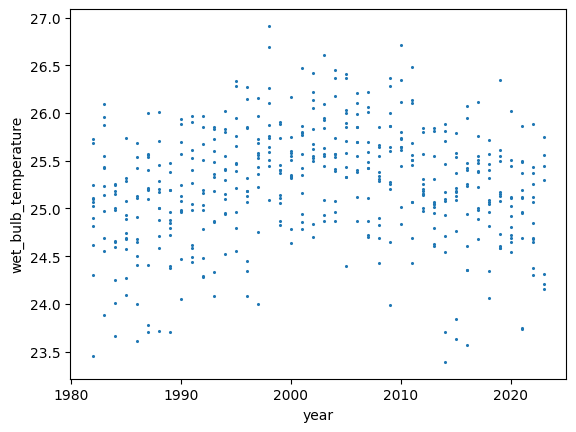

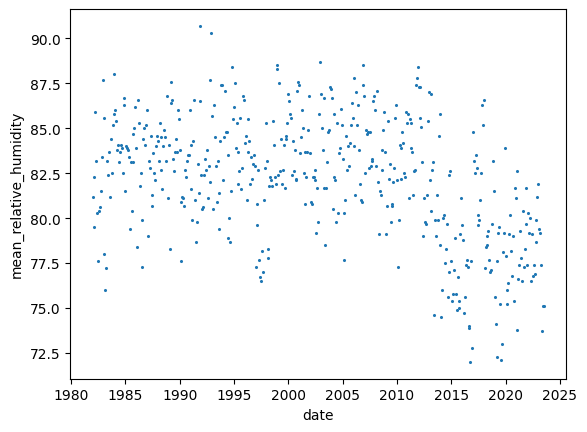

In [94]:
df_wet_buld_agg.plot(kind = 'scatter', x = 'year', y = 'wet_bulb_temperature',s=1.5)
df_humidity.plot(kind = 'scatter', x = 'date', y = 'mean_relative_humidity',s=1.5)

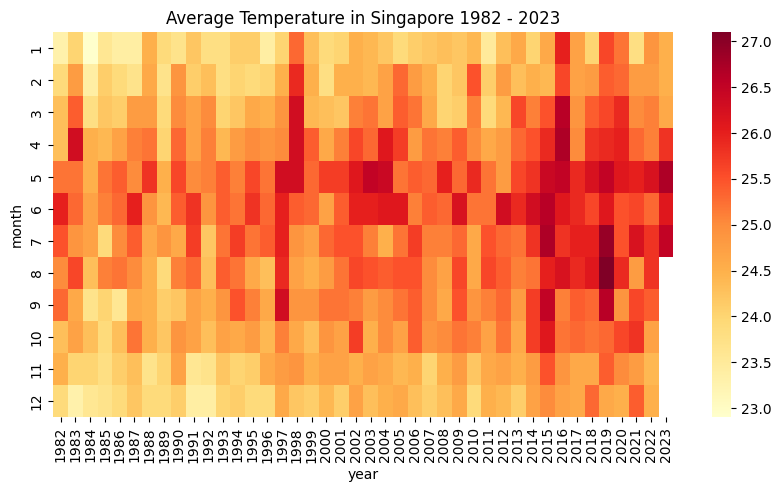

In [95]:
plt.figure(figsize=(10,5))

wet_bulb_matrix = df_avg_temp.pivot_table(values='temp_mean_daily_min', index='month', columns='year', aggfunc='mean')
sns.heatmap(wet_bulb_matrix, cmap='YlOrRd', annot=False)
plt.title('Average Temperature in Singapore 1982 - 2023')
plt.show()

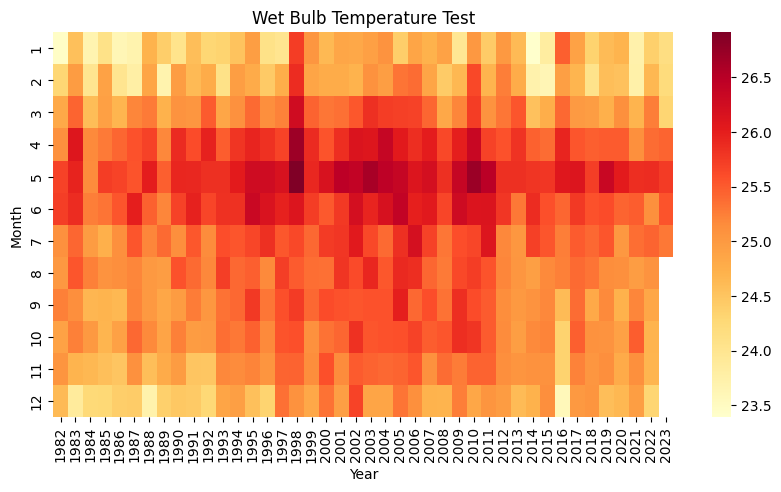

In [96]:
plt.figure(figsize=(10,5))

wet_bulb_matrix = df_wet_buld_agg.pivot_table(values='wet_bulb_temperature', index='month', columns='year', aggfunc='mean')
sns.heatmap(wet_bulb_matrix, cmap='YlOrRd', annot=False)
plt.xlabel('Year')
plt.ylabel('Month')
plt.title('Wet Bulb Temperature Test')
plt.show()

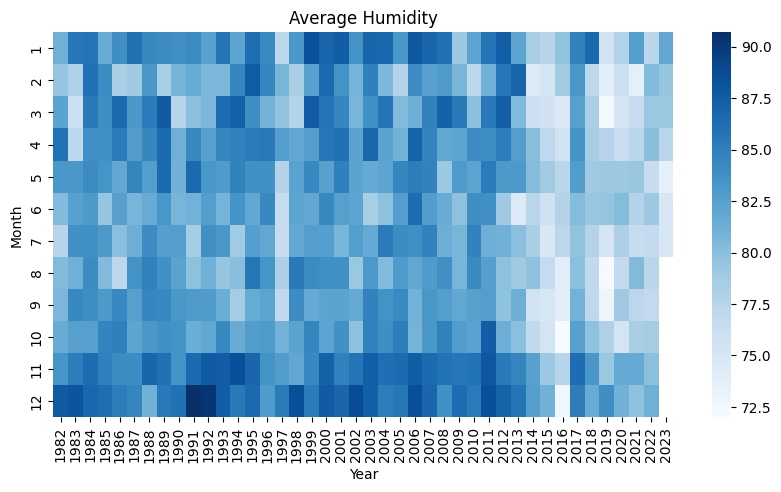

In [97]:
plt.figure(figsize=(10,5))

humidity_matrix = df_humidity.pivot_table(values='mean_relative_humidity',index='month', columns='year', aggfunc='mean')
sns.heatmap(humidity_matrix, cmap='Blues', annot=False)
plt.xlabel('Year')
plt.ylabel('Month')
plt.title('Average Humidity')
plt.show()

In [98]:
# Create New Dataframe [df_rain_days,df_rainfall,df_avg_temp,df_sun_hours,df_wet_buld,df_max_rainfall,[df_wet_buld_agg]]

df_main = pd.merge(df_max_rainfall,df_rain_days,how='left')
df_main = pd.merge(df_main,df_rainfall,how='left')
df_main = pd.merge(df_main,df_avg_temp,how='left')
df_main = pd.merge(df_main,df_sun_hours,how='left')
df_main = pd.merge(df_main,df_max_rainfall,how='left')
df_main.info()
df_main

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 499 non-null    datetime64[ns]
 1   max_rainall_in_day   499 non-null    float64       
 2   no_of_rainy_days     499 non-null    int64         
 3   total_rainfall       499 non-null    float64       
 4   temp_mean_daily_min  499 non-null    float64       
 5   year                 499 non-null    int32         
 6   month                499 non-null    int32         
 7   mean_sunshine_hrs    499 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int32(2), int64(1)
memory usage: 27.4 KB


,date,max_rainall_in_day,no_of_rainy_days,total_rainfall,temp_mean_daily_min,year,month,mean_sunshine_hrs
0,1982-01-01,36.5,10,107.1,23.3,1982,1,5.6
1,1982-02-01,9.4,5,27.8,23.9,1982,2,7.6
2,1982-03-01,61.7,11,160.8,24.3,1982,3,5.1
3,1982-04-01,45.1,14,157.0,24.3,1982,4,4.7
4,1982-05-01,33.0,10,102.2,25.2,1982,5,5.8
...,...,...,...,...,...,...,...,...
494,2023-03-01,90.2,12,243.4,24.6,2023,3,6.0
495,2023-04-01,85.8,19,222.8,25.8,2023,4,5.8
496,2023-05-01,34.6,11,112.8,26.7,2023,5,6.6
497,2023-06-01,51.6,15,228.4,26.1,2023,6,6.3


In [99]:
# Create New Dataframe merge another dataframe
# select field (df_wet_buld_agg,df_humidity)

df_main = pd.merge(df_main,df_humidity[['date','mean_relative_humidity']],on='date', how='left')
df_main = pd.merge(df_main,df_wet_buld_agg[['date','wet_bulb_temperature']],on='date', how='left')
df_main.info()
df_main

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    499 non-null    datetime64[ns]
 1   max_rainall_in_day      499 non-null    float64       
 2   no_of_rainy_days        499 non-null    int64         
 3   total_rainfall          499 non-null    float64       
 4   temp_mean_daily_min     499 non-null    float64       
 5   year                    499 non-null    int32         
 6   month                   499 non-null    int32         
 7   mean_sunshine_hrs       499 non-null    float64       
 8   mean_relative_humidity  499 non-null    float64       
 9   wet_bulb_temperature    499 non-null    float64       
dtypes: datetime64[ns](1), float64(6), int32(2), int64(1)
memory usage: 35.2 KB


,date,max_rainall_in_day,no_of_rainy_days,total_rainfall,temp_mean_daily_min,year,month,mean_sunshine_hrs,mean_relative_humidity,wet_bulb_temperature
0,1982-01-01,36.5,10,107.1,23.3,1982,1,5.6,81.2,23.456048
1,1982-02-01,9.4,5,27.8,23.9,1982,2,7.6,79.5,24.297619
2,1982-03-01,61.7,11,160.8,24.3,1982,3,5.1,82.3,24.811559
3,1982-04-01,45.1,14,157.0,24.3,1982,4,4.7,85.9,25.103750
4,1982-05-01,33.0,10,102.2,25.2,1982,5,5.8,83.2,25.689651
...,...,...,...,...,...,...,...,...,...,...
494,2023-03-01,90.2,12,243.4,24.6,2023,3,6.0,79.2,24.308199
495,2023-04-01,85.8,19,222.8,25.8,2023,4,5.8,77.4,25.440139
496,2023-05-01,34.6,11,112.8,26.7,2023,5,6.6,73.7,25.754435
497,2023-06-01,51.6,15,228.4,26.1,2023,6,6.3,75.1,25.562639


In [100]:
# Export to CSV for recheck
df_main.to_csv('data.csv', index=False)


In [101]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    499 non-null    datetime64[ns]
 1   max_rainall_in_day      499 non-null    float64       
 2   no_of_rainy_days        499 non-null    int64         
 3   total_rainfall          499 non-null    float64       
 4   temp_mean_daily_min     499 non-null    float64       
 5   year                    499 non-null    int32         
 6   month                   499 non-null    int32         
 7   mean_sunshine_hrs       499 non-null    float64       
 8   mean_relative_humidity  499 non-null    float64       
 9   wet_bulb_temperature    499 non-null    float64       
dtypes: datetime64[ns](1), float64(6), int32(2), int64(1)
memory usage: 35.2 KB


### Data Dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

*Note*: if you are unsure of what a feature is, check the source of the data! This can be found in the README.

**To-Do:** *Edit the table below to create your own data dictionary for the datasets you chose.*

|Feature|Type|Dataset|Description|
|---|---|---|---|
|total_rainfall|float|rainfall-monthly-total|Total rainfall in mm| 


## Exploratory Data Analysis

Complete the following steps to explore your data. You are welcome to do more EDA than the steps outlined here as you feel necessary:
1. Summary Statistics.
2. Use a **dictionary comprehension** to apply the standard deviation function you create in part 1 to each numeric column in the dataframe.  **No loops**.
    - Assign the output to variable `sd` as a dictionary where: 
        - Each column name is now a key 
        - That standard deviation of the column is the value 
        - *Example Output :* `{'rainfall-monthly-total': xxx, 'no_of_rainy_days': xxx, ...}`
3. Investigate trends in the data.
    - Using sorting and/or masking (along with the `.head()` method to avoid printing our entire dataframe), consider questions relevant to your problem statement. Some examples are provided below (but feel free to change these questions for your specific problem):
        - Which month have the highest and lowest total rainfall in 1990, 2000, 2010 and 2020?
        - Which year have the highest and lowest total rainfall in the date range of analysis?
        - Which month have the highest and lowest number of rainy days in 1990, 2000, 2010 and 2020?
        - Which year have the highest and lowest number of rainy days in the date range of analysis?
        - Are there any outliers months in the dataset?
       
    - **The above 5 questions are compulsory. Feel free to explore other trends based on the datasets that you have choosen for analysis. You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [102]:
#Code:
dict_df = df_main.to_dict()

In [103]:
#Code:
print(dict_df)

{'date': {0: Timestamp('1982-01-01 00:00:00'), 1: Timestamp('1982-02-01 00:00:00'), 2: Timestamp('1982-03-01 00:00:00'), 3: Timestamp('1982-04-01 00:00:00'), 4: Timestamp('1982-05-01 00:00:00'), 5: Timestamp('1982-06-01 00:00:00'), 6: Timestamp('1982-07-01 00:00:00'), 7: Timestamp('1982-08-01 00:00:00'), 8: Timestamp('1982-09-01 00:00:00'), 9: Timestamp('1982-10-01 00:00:00'), 10: Timestamp('1982-11-01 00:00:00'), 11: Timestamp('1982-12-01 00:00:00'), 12: Timestamp('1983-01-01 00:00:00'), 13: Timestamp('1983-02-01 00:00:00'), 14: Timestamp('1983-03-01 00:00:00'), 15: Timestamp('1983-04-01 00:00:00'), 16: Timestamp('1983-05-01 00:00:00'), 17: Timestamp('1983-06-01 00:00:00'), 18: Timestamp('1983-07-01 00:00:00'), 19: Timestamp('1983-08-01 00:00:00'), 20: Timestamp('1983-09-01 00:00:00'), 21: Timestamp('1983-10-01 00:00:00'), 22: Timestamp('1983-11-01 00:00:00'), 23: Timestamp('1983-12-01 00:00:00'), 24: Timestamp('1984-01-01 00:00:00'), 25: Timestamp('1984-02-01 00:00:00'), 26: Timestam

**To-Do:** *Edit this cell with your findings on trends in the data (step 3 above).*

## Visualize the Data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers. It is important to not only create visualizations, but to **interpret your visualizations** as well.

**Every plot should**:
- Have a title
- Have axis labels
- Have appropriate tick labels
- Text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Have an interpretation to aid understanding

Here is an example of what your plots should look like following the above guidelines. Note that while the content of this example is unrelated, the principles of visualization hold:

![](https://snag.gy/hCBR1U.jpg)
*Interpretation: The above image shows that as we increase our spending on advertising, our sales numbers also tend to increase. There is a positive correlation between advertising spending and sales.*

---

Here are some prompts to get you started with visualizations. Feel free to add additional visualizations as you see fit:
1. Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features.
    - Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).
    - Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).
2. Visualize distributions using histograms. If you have a lot, consider writing a custom function and use subplots.
    - *OPTIONAL*: Summarize the underlying distributions of your features (in words & statistics)
         - Be thorough in your verbal description of these distributions.
         - Be sure to back up these summaries with statistics.
         - We generally assume that data we sample from a population will be normally distributed. Do we observe this trend? Explain your answers for each distribution and how you think this will affect estimates made from these data.
3. Plot and interpret boxplots. 
    - Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.
    - Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).
    - Each boxplot should:
        - Only include variables of a similar scale
        - Have clear labels for each variable
        - Have appropriate titles and labels
4. Plot and interpret scatter plots to view relationships between features. Feel free to write a custom function, and subplot if you'd like. Functions save both time and space.
    - Your plots should have:
        - Two clearly labeled axes
        - A proper title
        - Colors and symbols that are clear and unmistakable
5. Additional plots of your choosing.
    - Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

Some ideas for plots that can be generated:

- Plot the histogram of the rainfall data with various bins and comment on the distribution of the data - is it centered, skewed?
- Plot the box-and-whiskers plot. Comment on the different quartiles and identify any outliers in the dataset. 
- Is there a correlation between the number of rainy days and total rainfall in the month? What kind of correlation do your suspect? Does the graph show the same?


In [104]:
# Code
list(df_main.columns)

['date',
 'max_rainall_in_day',
 'no_of_rainy_days',
 'total_rainfall',
 'temp_mean_daily_min',
 'year',
 'month',
 'mean_sunshine_hrs',
 'mean_relative_humidity',
 'wet_bulb_temperature']

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Make sure to answer your question of interest or address your problem statement here.

**To-Do:** *Edit this cell with your conclusions and recommendations.*

Don't forget to create your README!

**To-Do:** *If you combine your problem statement, data dictionary, brief summary of your analysis, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.* Don't forget to cite your data sources!

KeyError: 'temp_surface_max'

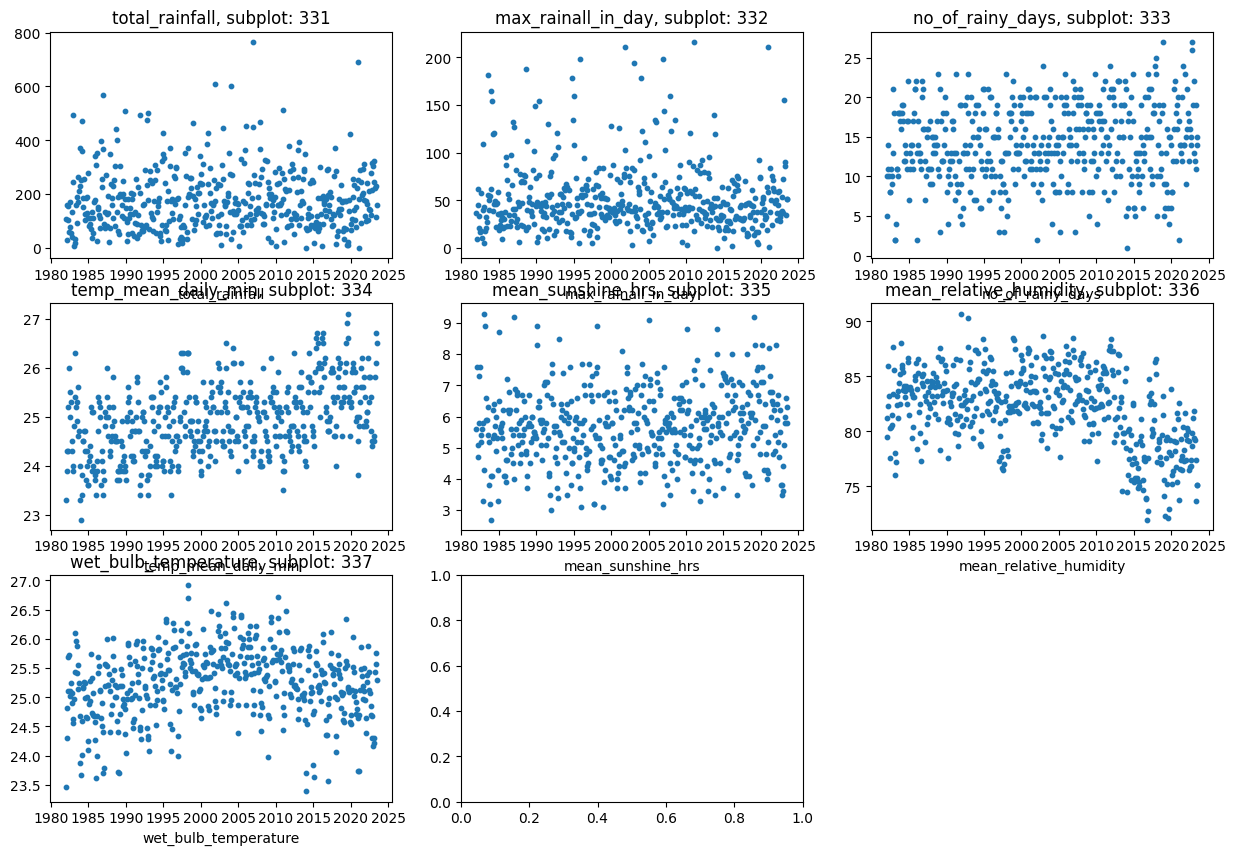

In [105]:
# Overview Chart

y = df_main[('date')]

col=['total_rainfall',
 'max_rainall_in_day',
 'no_of_rainy_days',
  'temp_mean_daily_min',
  'mean_sunshine_hrs',
 'mean_relative_humidity',
 'wet_bulb_temperature',
 'temp_surface_max',
 'temp_surface_min']



a = 3  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(15,10))

for i in col:
    plt.subplot(a, b, c)
    plt.scatter(y,df_main[i],s=10)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    c = c + 1
fig.tight_layout()
plt.show()

In [106]:
df_main.corr()

,date,max_rainall_in_day,no_of_rainy_days,total_rainfall,temp_mean_daily_min,year,month,mean_sunshine_hrs,mean_relative_humidity,wet_bulb_temperature
date,1.000000,-0.049901,0.122557,0.001709,0.432581,0.999713,0.006398,0.083445,-0.421062,0.069883
max_rainall_in_day,-0.049901,1.000000,0.383935,0.806196,-0.359286,-0.051733,0.076117,-0.378218,0.419576,-0.173083
no_of_rainy_days,0.122557,0.383935,1.000000,0.682878,-0.317119,0.112916,0.402269,-0.682118,0.550854,-0.007648
total_rainfall,0.001709,0.806196,0.682878,1.000000,-0.460764,-0.003432,0.214227,-0.574334,0.570737,-0.195407
temp_mean_daily_min,0.432581,-0.359286,-0.317119,-0.460764,1.000000,0.433055,-0.019269,0.418727,-0.642462,0.682145
year,0.999713,-0.051733,0.112916,-0.003432,0.433055,1.000000,-0.017539,0.095673,-0.424632,0.068603
month,0.006398,0.076117,0.402269,0.214227,-0.019269,-0.017539,1.000000,-0.510870,0.150998,0.056745
mean_sunshine_hrs,0.083445,-0.378218,-0.682118,-0.574334,0.418727,0.095673,-0.510870,1.000000,-0.567605,0.162819
mean_relative_humidity,-0.421062,0.419576,0.550854,0.570737,-0.642462,-0.424632,0.150998,-0.567605,1.000000,0.001445
wet_bulb_temperature,0.069883,-0.173083,-0.007648,-0.195407,0.682145,0.068603,0.056745,0.162819,0.001445,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

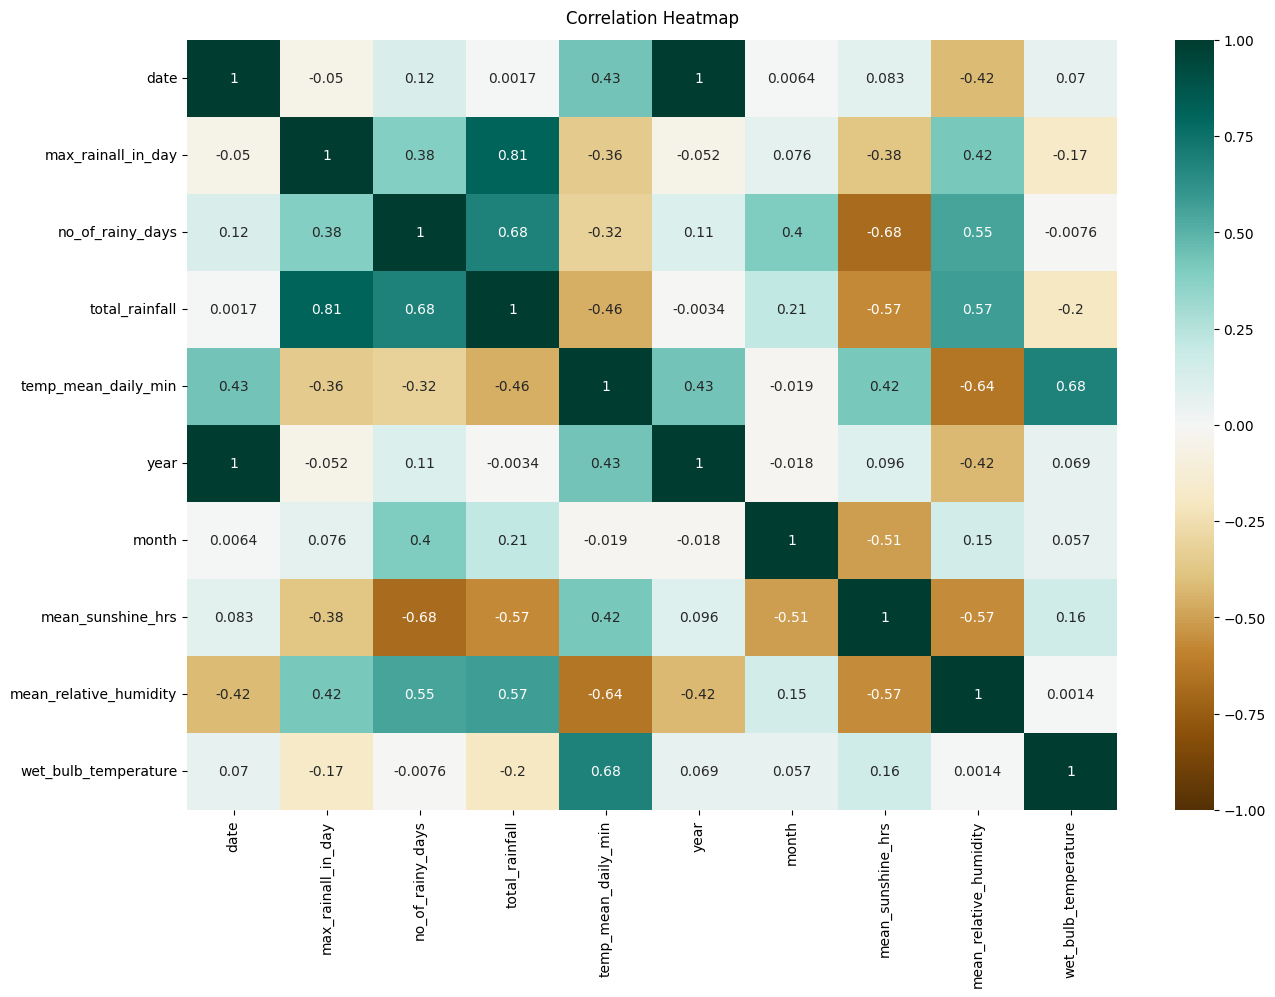

In [107]:
plt.figure(figsize=(15, 10))
heatmap = sns.heatmap(df_main.corr(),vmin=-1, vmax=1, annot=True,cmap='BrBG');
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [108]:
df_test = np.triu(np.ones_like(df_main.corr(),dtype=bool)),
df_test

(array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
          True],
        [False,  True,  True,  True,  True,  True,  True,  True,  True,
          True],
        [False, False,  True,  True,  True,  True,  True,  True,  True,
          True],
        [False, False, False,  True,  True,  True,  True,  True,  True,
          True],
        [False, False, False, False,  True,  True,  True,  True,  True,
          True],
        [False, False, False, False, False,  True,  True,  True,  True,
          True],
        [False, False, False, False, False, False,  True,  True,  True,
          True],
        [False, False, False, False, False, False, False,  True,  True,
          True],
        [False, False, False, False, False, False, False, False,  True,
          True],
        [False, False, False, False, False, False, False, False, False,
          True]]),)

array([[<Axes: title={'center': 'wet_bulb_temperature'}>]], dtype=object)

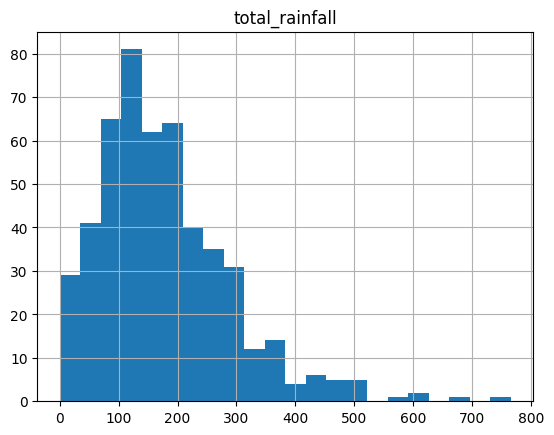

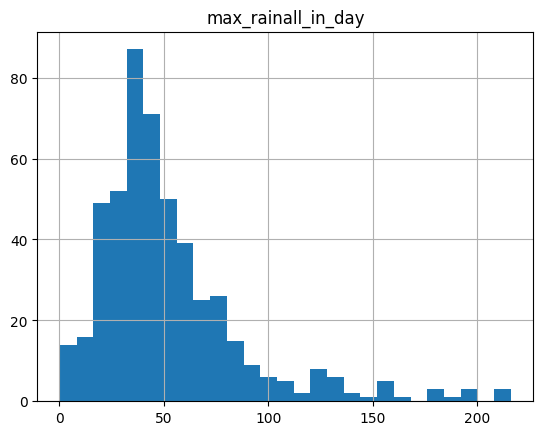

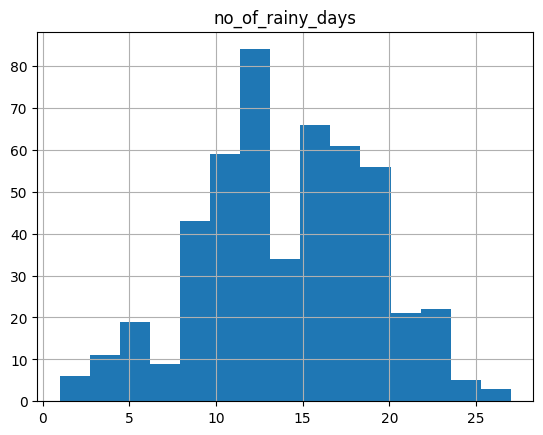

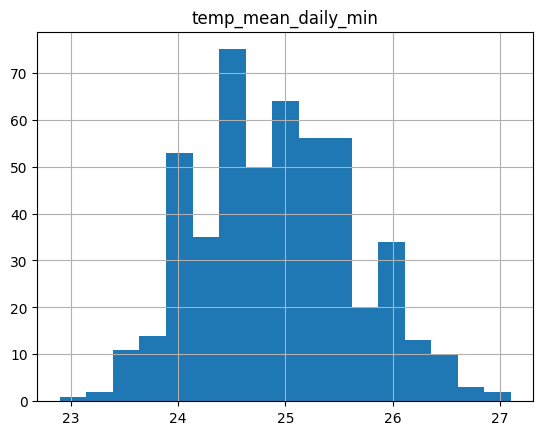

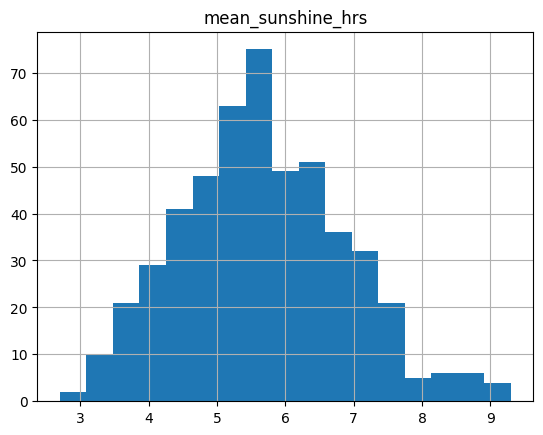

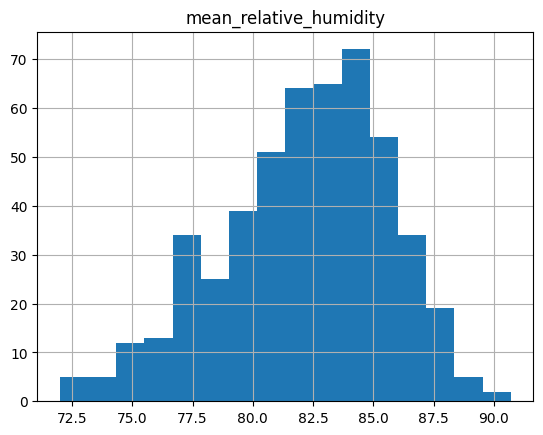

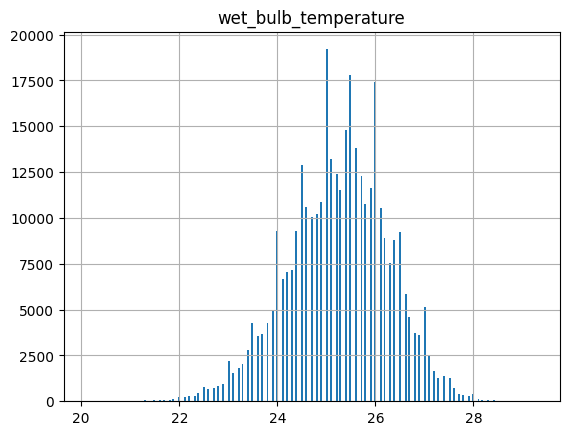

In [109]:
# Histrogram Chart
df_rainfall.hist(column='total_rainfall',bins='auto')
df_max_rainfall.hist(column='max_rainall_in_day',bins='auto')

df_rain_days.hist(column='no_of_rainy_days',bins='auto')
df_avg_temp.hist(column='temp_mean_daily_min',bins='auto')
df_sun_hours.hist(column='mean_sunshine_hrs',bins='auto')
df_humidity.hist(column='mean_relative_humidity',bins='auto')
df_wet_buld.hist(column='wet_bulb_temperature',bins='auto')

In [110]:
df_main['temp_mean_daily_min'].corr(df_main['mean_relative_humidity'])

-0.6424624616623887

KeyError: 'temp_surface_max'

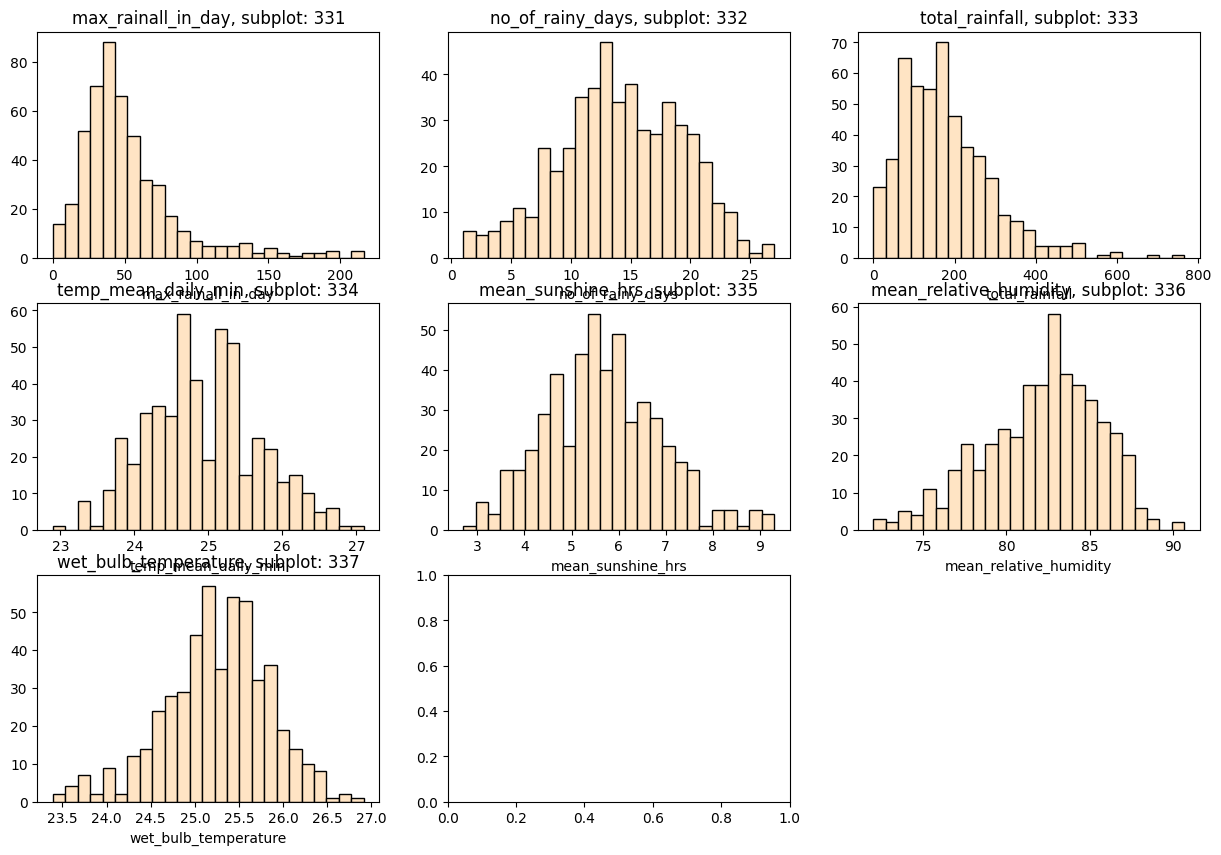

In [111]:
y = df_main[('date')]

col=['max_rainall_in_day',
 'no_of_rainy_days',
 'total_rainfall',
 'temp_mean_daily_min',
 'mean_sunshine_hrs',
 'mean_relative_humidity',
 'wet_bulb_temperature',
  'temp_surface_max',
 'temp_surface_min']

a = 3  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(15,10))

for i in col:
    plt.subplot(a, b, c)
    plt.hist(df_main[i],bins=25,color = "bisque",edgecolor = "black")
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    c = c + 1
fig.tight_layout()
plt.show()

In [ ]:
y = df_main[('date')]

col=['max_rainall_in_day',
 'no_of_rainy_days',
 'total_rainfall',
 'temp_mean_daily_min',
 'mean_sunshine_hrs',
 'mean_relative_humidity',
 'wet_bulb_temperature']

a = 3  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(15,10))
cm = plt.cm.get_cmap('RdYlBu_r')

for i in col:
    plt.subplot(a, b, c)
    plt.hist(df_main[i],bins=25,color = "bisque",edgecolor = "black")
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    c = c + 1
fig.tight_layout()
plt.show()

## External Data

In [112]:
df_max_air_temp_surface = pd.read_csv('data/external/monthly_average_air_temperature_max.csv')
df_min_air_temp_surface = pd.read_csv('data/external/monthly_average_air_temperature_min.csv')

In [113]:
df_max_air_temp_surface['month'] = pd.to_datetime(df_max_air_temp_surface['month'])
df_max_air_temp_surface.rename(columns = {'month': 'date'}, inplace = True)

df_min_air_temp_surface['month'] = pd.to_datetime(df_min_air_temp_surface['month'])
df_min_air_temp_surface.rename(columns = {'month': 'date'}, inplace = True)

df_max_air_temp_surface.rename(columns = {'temp_mean_daily_max': 'temp_surface_max'}, inplace = True)
df_min_air_temp_surface.rename(columns = {'temp_mean_daily_min': 'temp_surface_min'}, inplace = True)

print(df_max_air_temp_surface.info())
print(df_min_air_temp_surface.info())

df_max_air_temp_surface.head()
df_min_air_temp_surface.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              499 non-null    datetime64[ns]
 1   temp_surface_max  499 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 7.9 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              499 non-null    datetime64[ns]
 1   temp_surface_min  499 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 7.9 KB
None


,date,temp_surface_min
0,1982-01-01,23.3
1,1982-02-01,23.9
2,1982-03-01,24.3
3,1982-04-01,24.3
4,1982-05-01,25.2


In [114]:
df_main.head()

,date,max_rainall_in_day,no_of_rainy_days,total_rainfall,temp_mean_daily_min,year,month,mean_sunshine_hrs,mean_relative_humidity,wet_bulb_temperature
0,1982-01-01,36.5,10,107.1,23.3,1982,1,5.6,81.2,23.456048
1,1982-02-01,9.4,5,27.8,23.9,1982,2,7.6,79.5,24.297619
2,1982-03-01,61.7,11,160.8,24.3,1982,3,5.1,82.3,24.811559
3,1982-04-01,45.1,14,157.0,24.3,1982,4,4.7,85.9,25.103750
4,1982-05-01,33.0,10,102.2,25.2,1982,5,5.8,83.2,25.689651


In [115]:
df_main = pd.merge(df_main,df_max_air_temp_surface[['date','temp_surface_max']],on='date', how='left')
df_main = pd.merge(df_main,df_min_air_temp_surface[['date','temp_surface_min']],on='date', how='left')
df_main.info()
df_main

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    499 non-null    datetime64[ns]
 1   max_rainall_in_day      499 non-null    float64       
 2   no_of_rainy_days        499 non-null    int64         
 3   total_rainfall          499 non-null    float64       
 4   temp_mean_daily_min     499 non-null    float64       
 5   year                    499 non-null    int32         
 6   month                   499 non-null    int32         
 7   mean_sunshine_hrs       499 non-null    float64       
 8   mean_relative_humidity  499 non-null    float64       
 9   wet_bulb_temperature    499 non-null    float64       
 10  temp_surface_max        499 non-null    float64       
 11  temp_surface_min        499 non-null    float64       
dtypes: datetime64[ns](1), float64(8), int32(2), int64(

,date,max_rainall_in_day,no_of_rainy_days,total_rainfall,temp_mean_daily_min,year,month,mean_sunshine_hrs,mean_relative_humidity,wet_bulb_temperature,temp_surface_max,temp_surface_min
0,1982-01-01,36.5,10,107.1,23.3,1982,1,5.6,81.2,23.456048,29.8,23.3
1,1982-02-01,9.4,5,27.8,23.9,1982,2,7.6,79.5,24.297619,32.3,23.9
2,1982-03-01,61.7,11,160.8,24.3,1982,3,5.1,82.3,24.811559,31.7,24.3
3,1982-04-01,45.1,14,157.0,24.3,1982,4,4.7,85.9,25.103750,31.4,24.3
4,1982-05-01,33.0,10,102.2,25.2,1982,5,5.8,83.2,25.689651,31.7,25.2
...,...,...,...,...,...,...,...,...,...,...,...,...
494,2023-03-01,90.2,12,243.4,24.6,2023,3,6.0,79.2,24.308199,30.9,24.6
495,2023-04-01,85.8,19,222.8,25.8,2023,4,5.8,77.4,25.440139,32.6,25.8
496,2023-05-01,34.6,11,112.8,26.7,2023,5,6.6,73.7,25.754435,32.9,26.7
497,2023-06-01,51.6,15,228.4,26.1,2023,6,6.3,75.1,25.562639,32.1,26.1


In [116]:
df_max_air_temp_surface.head()

,date,temp_surface_max
0,1982-01-01,29.8
1,1982-02-01,32.3
2,1982-03-01,31.7
3,1982-04-01,31.4
4,1982-05-01,31.7


In [ ]:
df_main.head()

,date,max_rainall_in_day,no_of_rainy_days,total_rainfall,temp_mean_daily_min,year,month,mean_sunshine_hrs,mean_relative_humidity,wet_bulb_temperature,temp_surface_max,temp_surface_min
0,1982-01-01,36.5,10,107.1,23.3,1982,1,5.6,81.2,23.456048,29.8,23.3
1,1982-02-01,9.4,5,27.8,23.9,1982,2,7.6,79.5,24.297619,32.3,23.9
2,1982-03-01,61.7,11,160.8,24.3,1982,3,5.1,82.3,24.811559,31.7,24.3
3,1982-04-01,45.1,14,157.0,24.3,1982,4,4.7,85.9,25.103750,31.4,24.3
4,1982-05-01,33.0,10,102.2,25.2,1982,5,5.8,83.2,25.689651,31.7,25.2


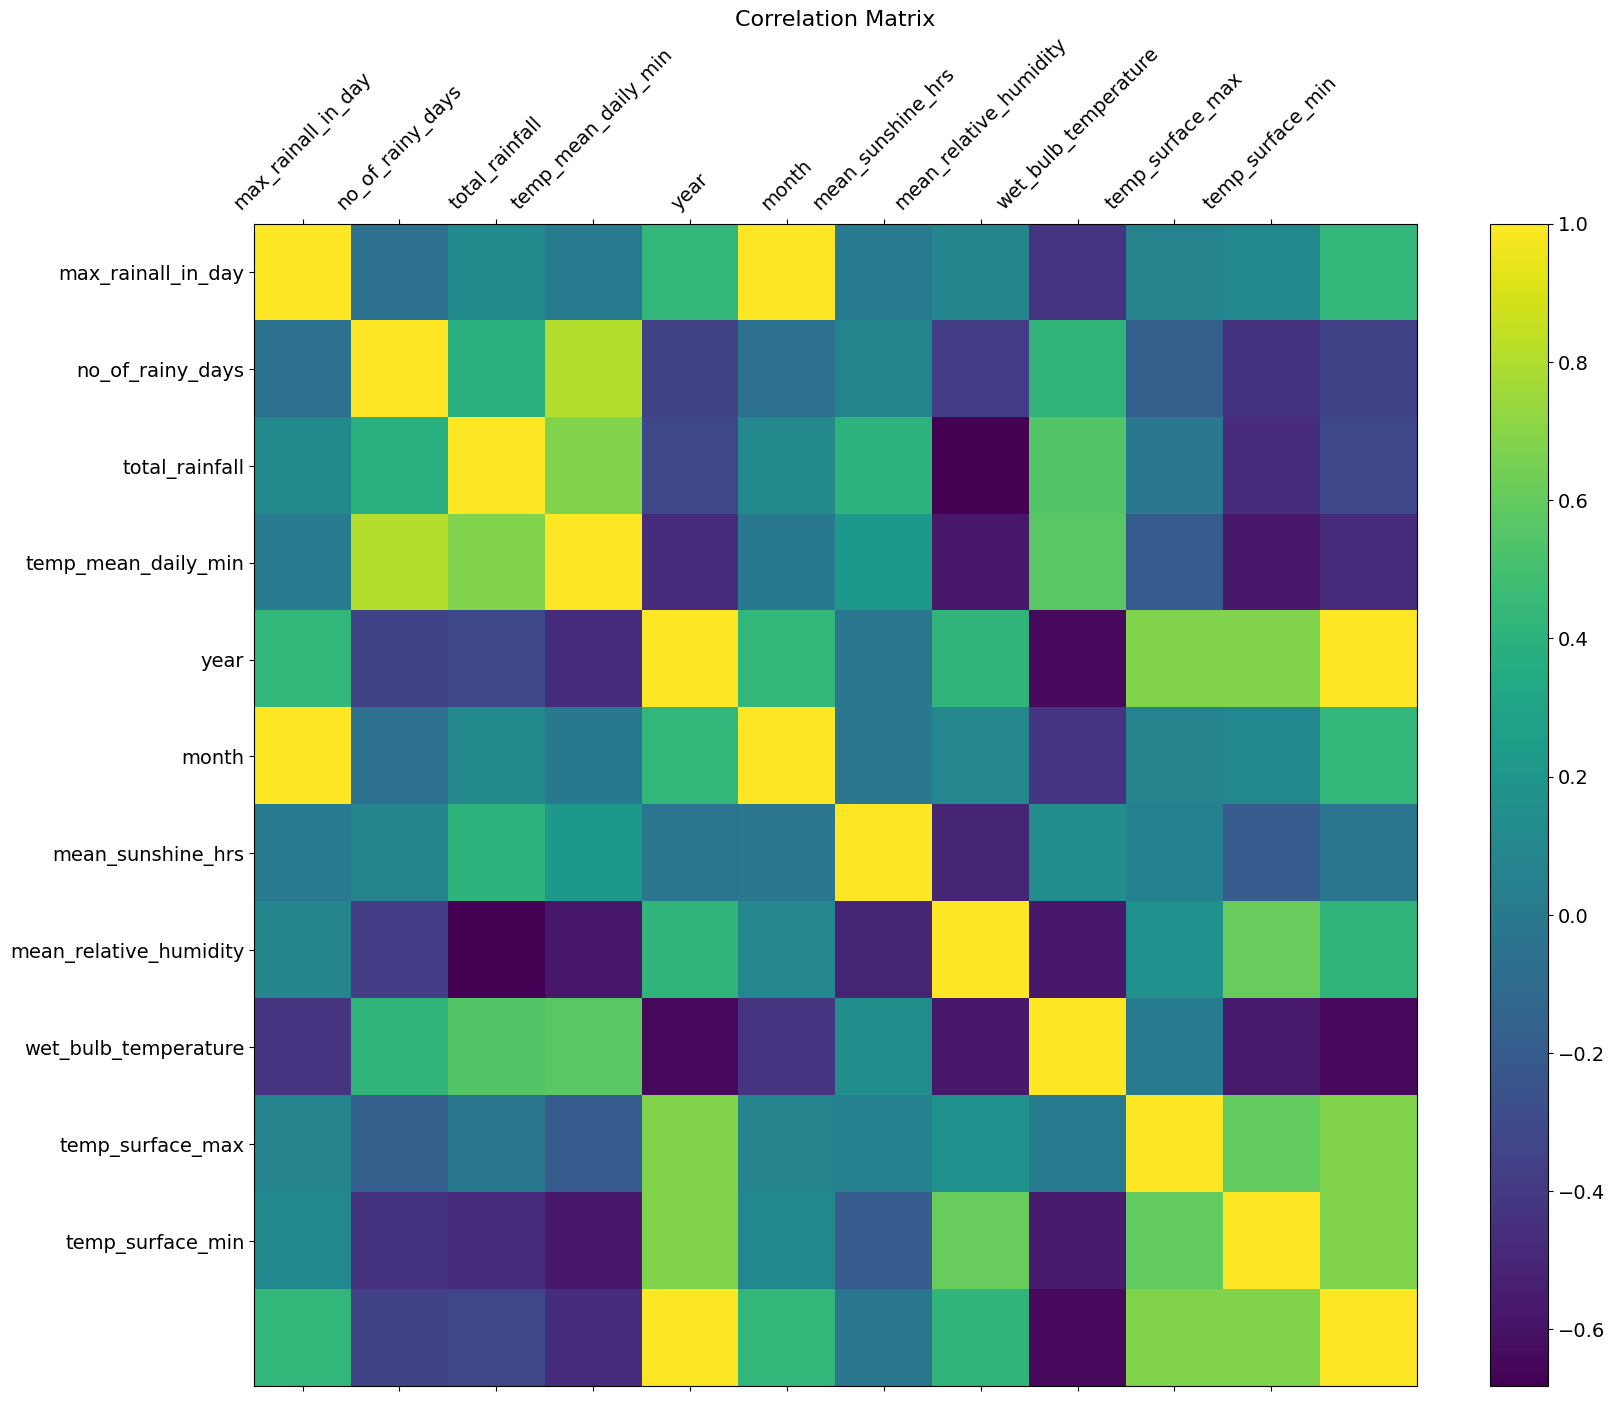

In [117]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df_main.corr(), fignum=f.number)
plt.xticks(range(df_main.select_dtypes(['number']).shape[1]), df_main.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df_main.select_dtypes(['number']).shape[1]), df_main.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

<Axes: xlabel='temp_surface_max', ylabel='temp_surface_min'>

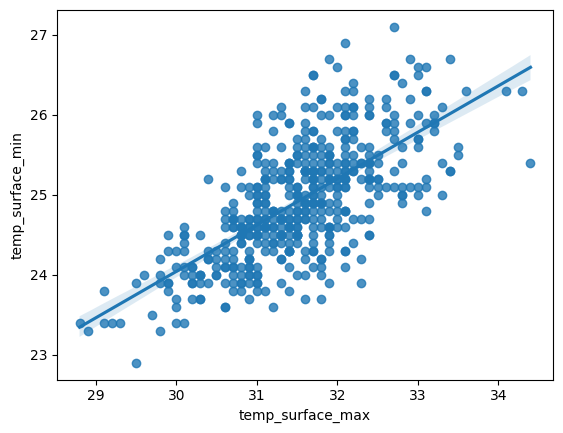

In [118]:
import numpy as np
import seaborn as sns

N = 100
x = df_main['temp_surface_max']
y = df_main['temp_surface_min']
sns.regplot(x=x, y=y)

<Axes: xlabel='total_rainfall', ylabel='no_of_rainy_days'>

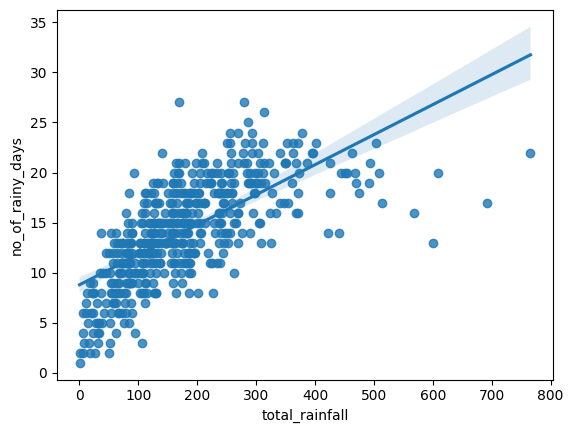

In [148]:
x = df_main.groupby(['year','month'])['total_rainfall'].median()
y = df_main.groupby(['year','month'])['no_of_rainy_days'].median()
sns.regplot(x=x, y=y)

<Axes: xlabel='total_rainfall', ylabel='temp_surface_max'>

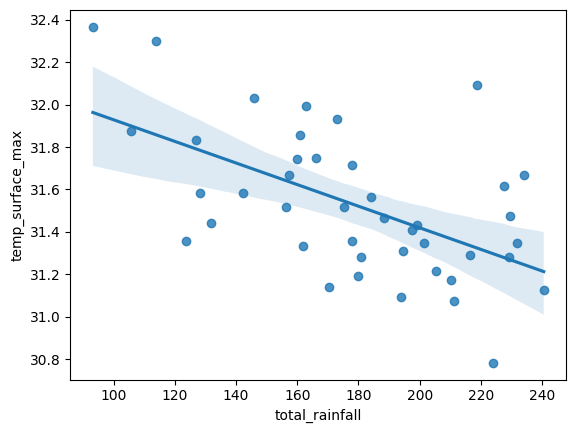

In [120]:
x = df_main.groupby('year')['total_rainfall'].mean()
y = df_main.groupby('year')['temp_surface_max'].mean()
sns.regplot(x=x, y=y)

In [121]:
df_main.head()

,date,max_rainall_in_day,no_of_rainy_days,total_rainfall,temp_mean_daily_min,year,month,mean_sunshine_hrs,mean_relative_humidity,wet_bulb_temperature,temp_surface_max,temp_surface_min
0,1982-01-01,36.5,10,107.1,23.3,1982,1,5.6,81.2,23.456048,29.8,23.3
1,1982-02-01,9.4,5,27.8,23.9,1982,2,7.6,79.5,24.297619,32.3,23.9
2,1982-03-01,61.7,11,160.8,24.3,1982,3,5.1,82.3,24.811559,31.7,24.3
3,1982-04-01,45.1,14,157.0,24.3,1982,4,4.7,85.9,25.103750,31.4,24.3
4,1982-05-01,33.0,10,102.2,25.2,1982,5,5.8,83.2,25.689651,31.7,25.2


In [122]:
df_main_2005 = df_main.loc[(df_main["date"] >= '2005-01-01')]
df_main_2005.head()

,date,max_rainall_in_day,no_of_rainy_days,total_rainfall,temp_mean_daily_min,year,month,mean_sunshine_hrs,mean_relative_humidity,wet_bulb_temperature,temp_surface_max,temp_surface_min
276,2005-01-01,96.7,8,163.2,23.9,2005,1,6.5,83.3,24.395968,30.2,23.9
277,2005-02-01,7.2,3,8.4,25.3,2005,2,9.1,77.7,25.330357,33.4,25.3
278,2005-03-01,20.5,12,82.4,25.4,2005,3,7.2,80.3,25.705780,33.3,25.4
279,2005-04-01,49.6,10,81.7,25.7,2005,4,7.0,81.0,26.036806,33.0,25.7
280,2005-05-01,58.7,20,331.1,25.2,2005,5,5.5,84.6,26.366532,32.4,25.2


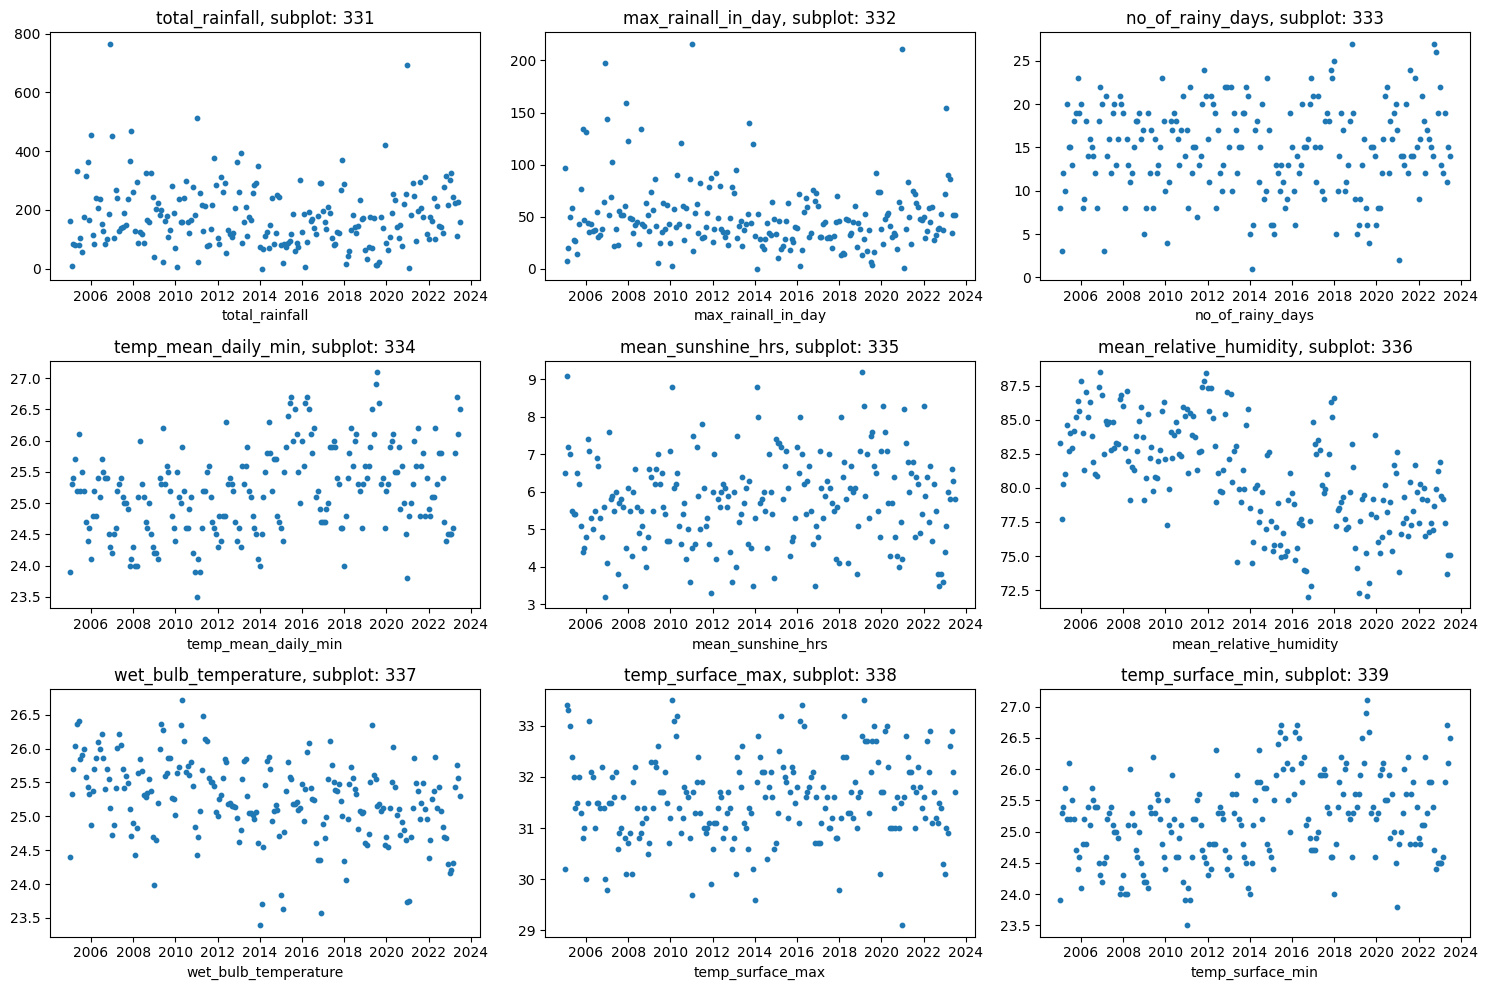

In [123]:
# Overview Chart

y = df_main_2005['date']

col=['total_rainfall',
 'max_rainall_in_day',
 'no_of_rainy_days',
  'temp_mean_daily_min',
  'mean_sunshine_hrs',
 'mean_relative_humidity',
 'wet_bulb_temperature',
 'temp_surface_max',
 'temp_surface_min']


a = 3  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(15,10))

for i in col:
    plt.subplot(a, b, c)
    plt.scatter(y,df_main_2005[i],s=10)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    c = c + 1
fig.tight_layout()
plt.show()

In [124]:
y = df_main.loc[(df_main["date"] > '2005-01-01')]
y.head()

,date,max_rainall_in_day,no_of_rainy_days,total_rainfall,temp_mean_daily_min,year,month,mean_sunshine_hrs,mean_relative_humidity,wet_bulb_temperature,temp_surface_max,temp_surface_min
277,2005-02-01,7.2,3,8.4,25.3,2005,2,9.1,77.7,25.330357,33.4,25.3
278,2005-03-01,20.5,12,82.4,25.4,2005,3,7.2,80.3,25.705780,33.3,25.4
279,2005-04-01,49.6,10,81.7,25.7,2005,4,7.0,81.0,26.036806,33.0,25.7
280,2005-05-01,58.7,20,331.1,25.2,2005,5,5.5,84.6,26.366532,32.4,25.2
281,2005-06-01,27.6,15,82.3,26.1,2005,6,5.4,82.7,26.405694,32.0,26.1


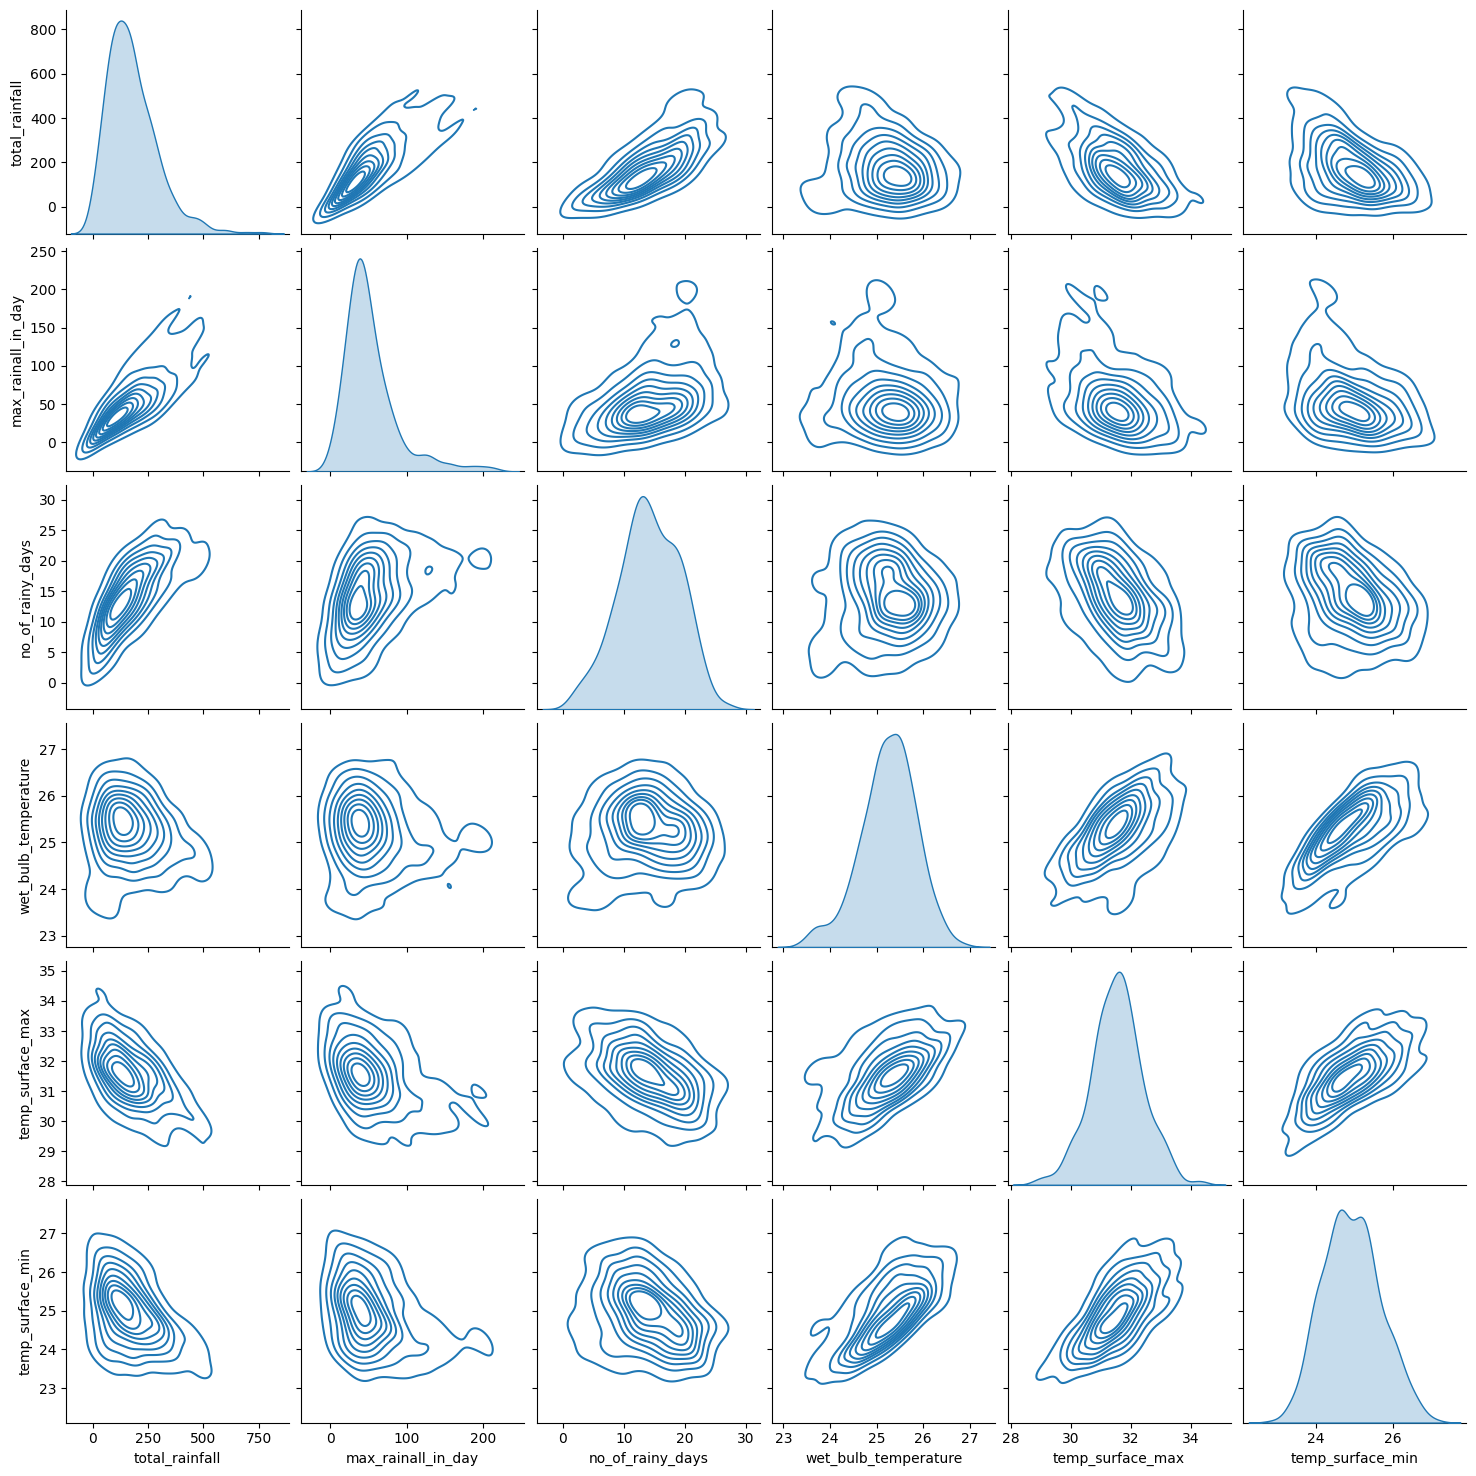

In [125]:
sns.pairplot(df_main[['total_rainfall',
 'max_rainall_in_day',
 'no_of_rainy_days',
#  'temp_mean_daily_min',
#  'mean_sunshine_hrs',
# 'mean_relative_humidity',
 'wet_bulb_temperature',
 'temp_surface_max',
 'temp_surface_min']],kind="kde")

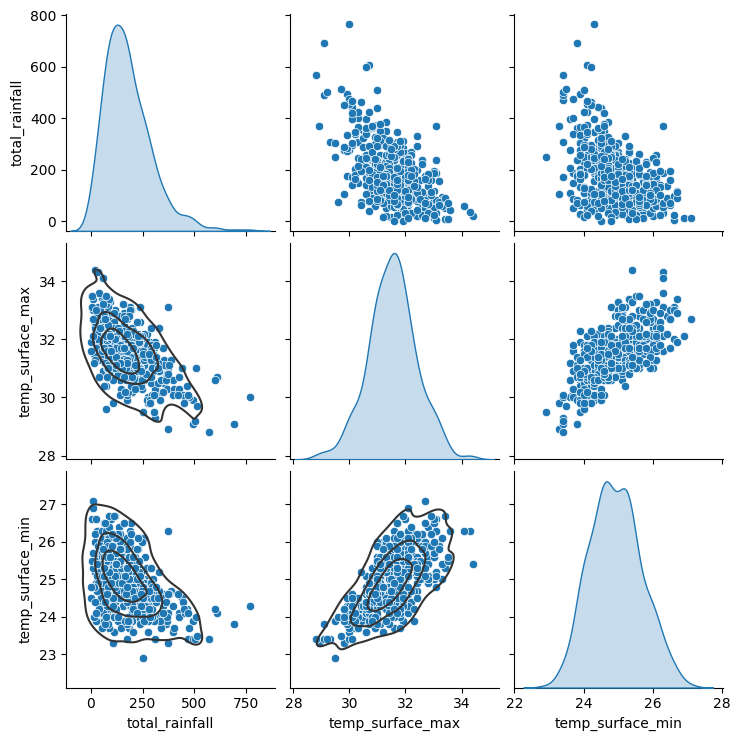

In [126]:
g = sns.pairplot(df_main[['total_rainfall','temp_surface_max','temp_surface_min']],diag_kind="kde")
g.map_lower(sns.kdeplot, levels=4, color=".2")

In [128]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    499 non-null    datetime64[ns]
 1   max_rainall_in_day      499 non-null    float64       
 2   no_of_rainy_days        499 non-null    int64         
 3   total_rainfall          499 non-null    float64       
 4   temp_mean_daily_min     499 non-null    float64       
 5   year                    499 non-null    int32         
 6   month                   499 non-null    int32         
 7   mean_sunshine_hrs       499 non-null    float64       
 8   mean_relative_humidity  499 non-null    float64       
 9   wet_bulb_temperature    499 non-null    float64       
 10  temp_surface_max        499 non-null    float64       
 11  temp_surface_min        499 non-null    float64       
dtypes: datetime64[ns](1), float64(8), int32(2), int64(

178.31162324649299
24.92665330661323


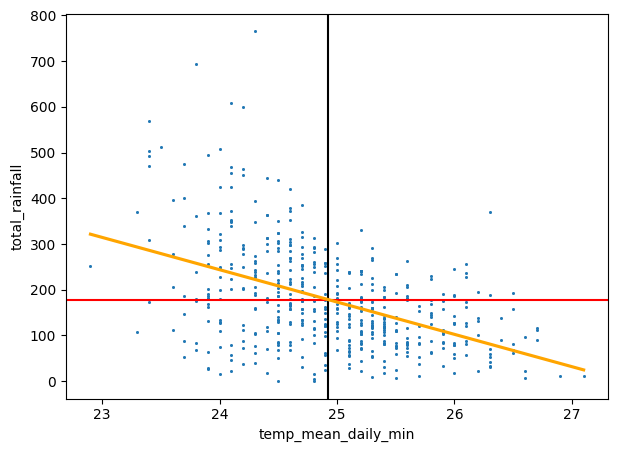

In [127]:
# Plot temp_mean_daily_min (temp) vs. total_rainfall (demand)
plt.figure(figsize=(7,5))
plt.scatter(df_main['temp_mean_daily_min'],df_main['total_rainfall'],s=1)
plt.axhline(df_main['total_rainfall'].mean(),color = 'red')
plt.axvline(df_main['temp_mean_daily_min'].mean(),color = 'black')
sns.regplot(data=df_main, x='temp_mean_daily_min',y='total_rainfall', ci=None, 
            scatter_kws = {'s': 1}, 
            line_kws = {'color': 'orange'})
plt.xlabel("temp_mean_daily_min")
plt.ylabel("total_rainfall")

print(df_main['total_rainfall'].mean())
print(df_main['temp_mean_daily_min'].mean())

In [129]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [136]:


xvars = [
    "max_rainall_in_day","total_rainfall","temp_mean_daily_min"
]

X = df_main[xvars]
X = pd.get_dummies(columns=["max_rainall_in_day","max_rainall_in_day"], data=X, drop_first=True)

In [137]:
X.head()

,total_rainfall,temp_mean_daily_min,max_rainall_in_day_0.6,max_rainall_in_day_2.4,max_rainall_in_day_2.9,max_rainall_in_day_3.2,max_rainall_in_day_3.8,max_rainall_in_day_5.1,max_rainall_in_day_5.4,max_rainall_in_day_5.7,...,max_rainall_in_day_177.8,max_rainall_in_day_178.3,max_rainall_in_day_181.8,max_rainall_in_day_187.3,max_rainall_in_day_194.4,max_rainall_in_day_198.0,max_rainall_in_day_198.6,max_rainall_in_day_210.6,max_rainall_in_day_211.1,max_rainall_in_day_216.2
0,107.1,23.3,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,27.8,23.9,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,160.8,24.3,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,157.0,24.3,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,102.2,25.2,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [138]:
y = df_main['month']

In [139]:
model_temp = LinearRegression()
model_temp.fit(X, y)

LinearRegression()

In [140]:
model_temp.score(X, y)

0.7749252140270985

In [141]:
pd.crosstab(df_main["year"], df_main["month"])

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
1982,1,1,1,1,1,1,1,1,1,1,1,1
1983,1,1,1,1,1,1,1,1,1,1,1,1
1984,1,1,1,1,1,1,1,1,1,1,1,1
1985,1,1,1,1,1,1,1,1,1,1,1,1
1986,1,1,1,1,1,1,1,1,1,1,1,1
1987,1,1,1,1,1,1,1,1,1,1,1,1
1988,1,1,1,1,1,1,1,1,1,1,1,1
1989,1,1,1,1,1,1,1,1,1,1,1,1
1990,1,1,1,1,1,1,1,1,1,1,1,1


In [145]:
# ARMA example
from statsmodels.tsa.arima.model import ARIMA
# contrived dataset
data = ["temp_mean_daily_min","total_rainfall"]
# fit model
model = ARIMA(df_main, order=(2, 0, 1))
model_fit = df_main.fit()
# make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat)

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).